<a href="https://colab.research.google.com/github/erneyurrego-art/Introducci-n-a-la-IA/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepocesado

- Limpieza de los datos.
- Preprocesado de los datos

### Bibliotecas a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar el dataset

In [ ]:
try:
    d = pd.read_csv('train.csv', on_bad_lines='skip')
    display(d.head())
except Exception as e:
    print(f"An error occurred: {e}")

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
periodo = d['PERIODO_ACADEMICO'].unique()
periodo = sorted(periodo)
print(periodo)

[np.int64(20183), np.int64(20184), np.int64(20194), np.int64(20195), np.int64(20196), np.int64(20202), np.int64(20203), np.int64(20212), np.int64(20213)]


Eliminar variables que no le aportan peso al dataset, en el cual se encuentra F_TIENEINTERNET.1 e ID, ya que la primera no necesariamente es una variable duplicada, y ID no aporta ninguna información para el modelo de Machine Learning, ya que son los identificadores de los registros del dataset.

In [ ]:
try:
    d = d.drop(columns=['F_TIENEINTERNET.1', 'ID'])
    display(d.head(4))
except:
    display(d.head(4))

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60598 entries, 0 to 60597
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PERIODO_ACADEMICO            60598 non-null  int64  
 1   E_PRGM_ACADEMICO             60598 non-null  object 
 2   E_PRGM_DEPARTAMENTO          60598 non-null  object 
 3   E_VALORMATRICULAUNIVERSIDAD  60034 non-null  object 
 4   E_HORASSEMANATRABAJA         57928 non-null  object 
 5   F_ESTRATOVIVIENDA            57763 non-null  object 
 6   F_TIENEINTERNET              58284 non-null  object 
 7   F_EDUCACIONPADRE             58595 non-null  object 
 8   F_TIENELAVADORA              57152 non-null  object 
 9   F_TIENEAUTOMOVIL             56846 non-null  object 
 10  E_PRIVADO_LIBERTAD           60597 non-null  object 
 11  E_PAGOMATRICULAPROPIO        60014 non-null  object 
 12  F_TIENECOMPUTADOR            57288 non-null  object 
 13  F_EDUCACIONMADRE

In [ ]:
d.head(4)
nullValues = d.isnull().sum()
print("Valores nulos totales por columna", nullValues)

Valores nulos totales por columna PERIODO_ACADEMICO                 0
E_PRGM_ACADEMICO                  0
E_PRGM_DEPARTAMENTO               0
E_VALORMATRICULAUNIVERSIDAD     564
E_HORASSEMANATRABAJA           2670
F_ESTRATOVIVIENDA              2835
F_TIENEINTERNET                2314
F_EDUCACIONPADRE               2003
F_TIENELAVADORA                3446
F_TIENEAUTOMOVIL               3752
E_PRIVADO_LIBERTAD                1
E_PAGOMATRICULAPROPIO           584
F_TIENECOMPUTADOR              3310
F_EDUCACIONMADRE               2048
RENDIMIENTO_GLOBAL                1
INDICADOR_1                       1
INDICADOR_2                       1
INDICADOR_3                       1
INDICADOR_4                       1
dtype: int64


Visualizar el porcentaje de valores nulos de todas las columnas para determinar si hay columnas que se deben de eliminar. En este caso, tienen un nivel de porcentaje de valores nulos aceptable y que se pueden rellenar o hacerle algún tratamiento; en este caso puede ser la moda, ya que son variables categóricas.

In [ ]:
print("Porcentaje de valores nulos por columna")
print(d.isnull().mean()*100)


Porcentaje de valores nulos por columna
PERIODO_ACADEMICO              0.000000
E_PRGM_ACADEMICO               0.000000
E_PRGM_DEPARTAMENTO            0.000000
E_VALORMATRICULAUNIVERSIDAD    0.930724
E_HORASSEMANATRABAJA           4.406086
F_ESTRATOVIVIENDA              4.678372
F_TIENEINTERNET                3.818608
F_EDUCACIONPADRE               3.305390
F_TIENELAVADORA                5.686656
F_TIENEAUTOMOVIL               6.191623
E_PRIVADO_LIBERTAD             0.001650
E_PAGOMATRICULAPROPIO          0.963728
F_TIENECOMPUTADOR              5.462226
F_EDUCACIONMADRE               3.379649
RENDIMIENTO_GLOBAL             0.001650
INDICADOR_1                    0.001650
INDICADOR_2                    0.001650
INDICADOR_3                    0.001650
INDICADOR_4                    0.001650
dtype: float64


### limpieza de variables

In [ ]:
cols_to_fill = nullValues[nullValues/len(d) < 0.07].index.intersection(d.columns)

for col in cols_to_fill:
    d[col] = d[col].fillna(d[col].mode()[0])

print("Valores despues del llenado:")
print(d.isnull().sum())

Valores despues del llenado:
PERIODO_ACADEMICO              0
E_PRGM_ACADEMICO               0
E_PRGM_DEPARTAMENTO            0
E_VALORMATRICULAUNIVERSIDAD    0
E_HORASSEMANATRABAJA           0
F_ESTRATOVIVIENDA              0
F_TIENEINTERNET                0
F_EDUCACIONPADRE               0
F_TIENELAVADORA                0
F_TIENEAUTOMOVIL               0
E_PRIVADO_LIBERTAD             0
E_PAGOMATRICULAPROPIO          0
F_TIENECOMPUTADOR              0
F_EDUCACIONMADRE               0
RENDIMIENTO_GLOBAL             0
INDICADOR_1                    0
INDICADOR_2                    0
INDICADOR_3                    0
INDICADOR_4                    0
dtype: int64


En estas variables hice lo siguiente: en el caso de F_EDUCACIONMADRE y F_EDUCACIONPADRE, tienen dos categorías que son "No sabe" y "No aplica", que realmente se pueden englobar en una sola categoría. En el caso de F_PRGM_ACADEMICO, tiene muchas categorías con un nivel de frecuencia muy bajo; por esta razón, las categorías menores o iguales a $0.01$ se englobarán en una sola categoría, y de esta manera, será una variable más manejable.

In [ ]:
d[['F_EDUCACIONMADRE', 'F_EDUCACIONPADRE']] = d[['F_EDUCACIONMADRE', 'F_EDUCACIONPADRE']].replace({
    'No sabe': 'Ninguno',
    'No Aplica': 'Ninguno'
})


In [ ]:
frec = d['E_PRGM_ACADEMICO'].value_counts(normalize=True)
main_categories = frec[frec > 0.01].index
d['E_PRGM_ACADEMICO'] = d['E_PRGM_ACADEMICO'].apply(lambda x: x if x in main_categories else 'OTRA')

In [ ]:
d['E_PRGM_ACADEMICO'].value_counts() # hubo una reducción significativa

,count
E_PRGM_ACADEMICO,
OTRA,25505
DERECHO,4671
ADMINISTRACION DE EMPRESAS,4483
CONTADURIA PUBLICA,3401
PSICOLOGIA,2785
INGENIERIA INDUSTRIAL,2506
ADMINISTRACIÓN DE EMPRESAS,2199
INGENIERIA CIVIL,1698
MEDICINA,1558


In [ ]:
''' cols_to_fill2 = nullValues[nullValues/len(d) > 0.05].index.intersection(d.columns)

for col in cols_to_fill2:
    d[col] = d[col].fillna("Sin informacion")

print("Valores despues del llenado:")
print(d.isnull().sum()) '''

' cols_to_fill2 = nullValues[nullValues/len(d) > 0.05].index.intersection(d.columns)\n\nfor col in cols_to_fill2:\n    d[col] = d[col].fillna("Sin informacion")\n\nprint("Valores despues del llenado:")\nprint(d.isnull().sum()) '

### Preprocesado variables

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

Para las variables E_PRGM_ACADEMICO y E_PRGM_DEPARTAMENTO, les apliqué una conversión usando One-Hot Encoding, ya que son categorías no ordenadas, además de que el número de sus categorías es mayor a 20.

In [ ]:
def one_hot_columns(d, columns):
    return pd.get_dummies(d, columns=columns, dtype=int)

In [ ]:
columns_for_one_hot = ['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO']
d = one_hot_columns(d, columns_for_one_hot)


Para columnas del tipo ordinal que tienen un orden y, además, sus categorías tienen menos de 10, se pueden convertir con manual mapping u Ordinal Encoder con scikit-learn. En este caso, apliqué ambas para probar diferentes métodos de conversión y ver cómo se comporta el modelo.

In [ ]:
extract_mapping = {
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

d['F_ESTRATOVIVIENDA'] = d['F_ESTRATOVIVIENDA'].replace(extract_mapping)

/tmp/ipython-input-1778904175.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['F_ESTRATOVIVIENDA'] = d['F_ESTRATOVIVIENDA'].replace(extract_mapping)


In [ ]:
educational_level_order = [
    'Ninguno',
    'Primaria incompleta',
    'Primaria completa',
    'Secundaria (Bachillerato) incompleta',
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa',
    'Educación profesional incompleta',
    'Educación profesional completa',
    'Postgrado'
]

payment_order = [
    'No pagó matrícula',
    'Menos de 500 mil',
    'Entre 500 mil y menos de 1 millón',
    'Entre 1 millón y menos de 2.5 millones',
    'Entre 2.5 millones y menos de 4 millones',
    'Entre 4 millones y menos de 5.5 millones',
    'Entre 5.5 millones y menos de 7 millones',
    'Más de 7 millones'
]

hours_order = [
    '0',
    'Menos de 10 horas',
    'Entre 11 y 20 horas',
    'Entre 21 y 30 horas',
    'Más de 30 horas'
]


In [ ]:
def encode_ordinal_columns(d, transformer_column, order):
    encoder = OrdinalEncoder(categories=[order])
    d[transformer_column] = encoder.fit_transform(d[[transformer_column]])
    return d

encode_ordinal_columns(d, 'E_HORASSEMANATRABAJA', hours_order)
encode_ordinal_columns(d, 'E_VALORMATRICULAUNIVERSIDAD', payment_order)
encode_ordinal_columns(d, 'F_EDUCACIONMADRE', educational_level_order)
encode_ordinal_columns(d, 'F_EDUCACIONPADRE', educational_level_order)


,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,E_PRGM_DEPARTAMENTO_NARIÑO,E_PRGM_DEPARTAMENTO_NORTE SANTANDER,E_PRGM_DEPARTAMENTO_PUTUMAYO,E_PRGM_DEPARTAMENTO_QUINDIO,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE,E_PRGM_DEPARTAMENTO_VAUPES
0,20212,6.0,1.0,3,Si,5.0,Si,Si,N,No,...,0,0,0,0,0,0,0,0,0,0
1,20212,4.0,0.0,3,No,6.0,Si,No,N,No,...,0,0,0,0,0,0,0,0,0,0
2,20203,4.0,4.0,3,Si,4.0,Si,No,N,No,...,0,0,0,0,0,0,0,0,0,0
3,20195,5.0,0.0,4,Si,0.0,Si,No,N,No,...,0,0,0,0,0,1,0,0,0,0
4,20212,4.0,3.0,3,Si,2.0,Si,Si,N,No,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60593,20195,4.0,1.0,3,Si,9.0,Si,Si,N,No,...,0,0,0,0,0,0,0,0,0,0
60594,20195,3.0,1.0,1,No,4.0,No,No,N,No,...,0,0,0,0,0,0,0,0,0,0
60595,20203,4.0,4.0,2,Si,1.0,Si,No,N,No,...,0,0,0,0,0,0,0,0,0,0
60596,20203,5.0,4.0,2,Si,3.0,Si,No,N,Si,...,0,0,0,0,0,0,0,0,0,0


Y para las variables binarias, utilicé el método de codificación binaria, ya que los valores que se manejan son "SÍ" y "NO", que luego con este método de transformación se convertirán en 0 y 1.

In [ ]:
def replace_binary_columns(d, columns, mapping):
  for col in columns:
    d[col] = d[col].map(mapping)

  return d

In [ ]:
cols_si_no = ['F_TIENEINTERNET', 'F_TIENEAUTOMOVIL', 'F_TIENECOMPUTADOR', 'E_PAGOMATRICULAPROPIO', 'F_TIENELAVADORA']
cols_s_n = ['E_PRIVADO_LIBERTAD']

In [ ]:
d = replace_binary_columns(d, cols_si_no, {'No': 0, 'Si': 1})
d = replace_binary_columns(d, cols_s_n, {'N': 0, 'S': 1})

In [ ]:
# transformación variable objetivo:

In [ ]:
orden_rendimiento = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
}

d['RENDIMIENTO_GLOBAL'] = d['RENDIMIENTO_GLOBAL'].replace(orden_rendimiento)

/tmp/ipython-input-3551991104.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['RENDIMIENTO_GLOBAL'] = d['RENDIMIENTO_GLOBAL'].replace(orden_rendimiento)


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60598 entries, 0 to 60597
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   PERIODO_ACADEMICO                                     60598 non-null  int64  
 1   E_VALORMATRICULAUNIVERSIDAD                           60598 non-null  float64
 2   E_HORASSEMANATRABAJA                                  60598 non-null  float64
 3   F_ESTRATOVIVIENDA                                     60598 non-null  int64  
 4   F_TIENEINTERNET                                       60598 non-null  int64  
 5   F_EDUCACIONPADRE                                      60598 non-null  float64
 6   F_TIENELAVADORA                                       60598 non-null  int64  
 7   F_TIENEAUTOMOVIL                                      60598 non-null  int64  
 8   E_PRIVADO_LIBERTAD                                    60

### Preprocesado variables númericas

In [ ]:
d[['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']].describe()

,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
count,60598.000000,60598.000000,60598.000000,60598.000000
mean,0.269406,0.259101,0.262198,0.262575
std,0.122237,0.093101,0.059030,0.068133
min,0.000000,0.000000,0.000000,0.000000
25%,0.204000,0.212000,0.255000,0.255000
50%,0.241000,0.253000,0.277000,0.285000
75%,0.314000,0.308000,0.293000,0.302000
max,0.657000,0.487000,0.320000,0.332000


In [ ]:
# Ninguna sigue una distribución normal como tal

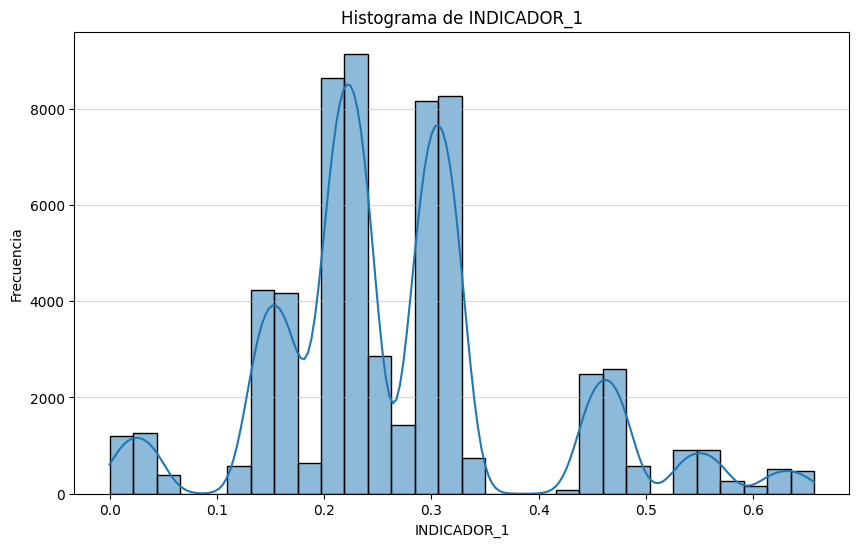

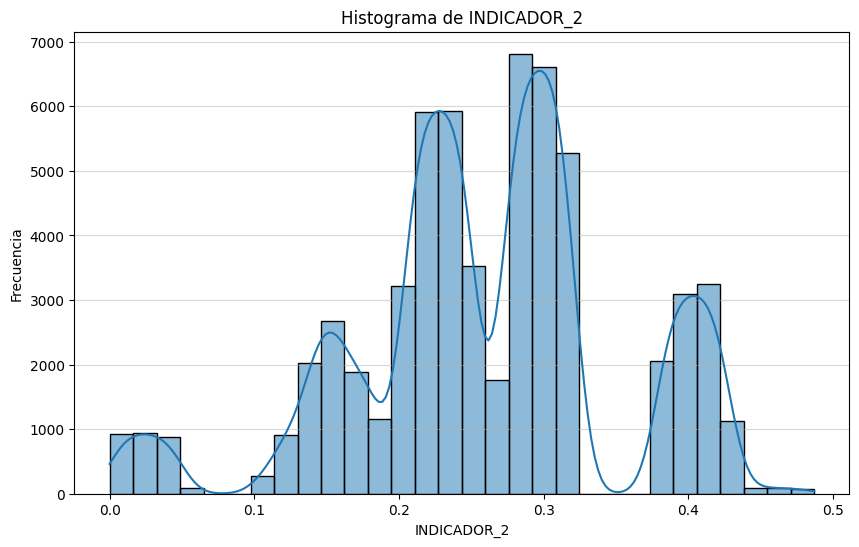

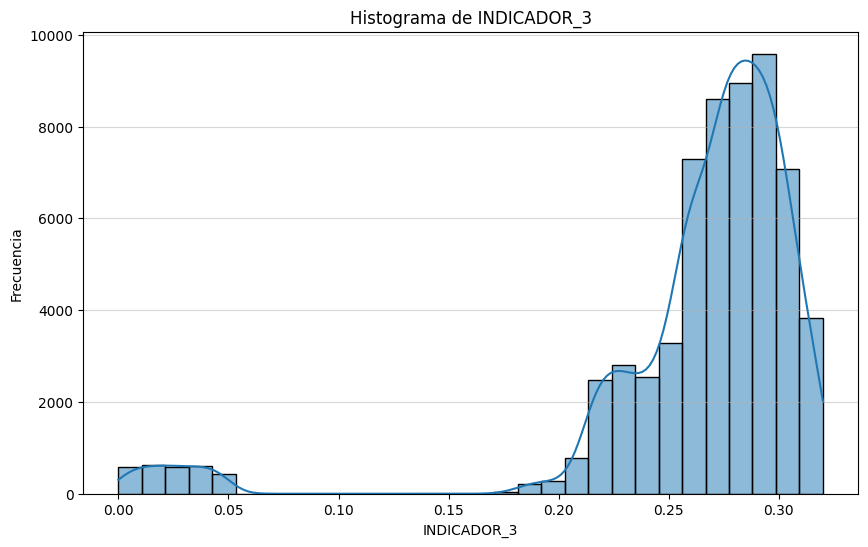

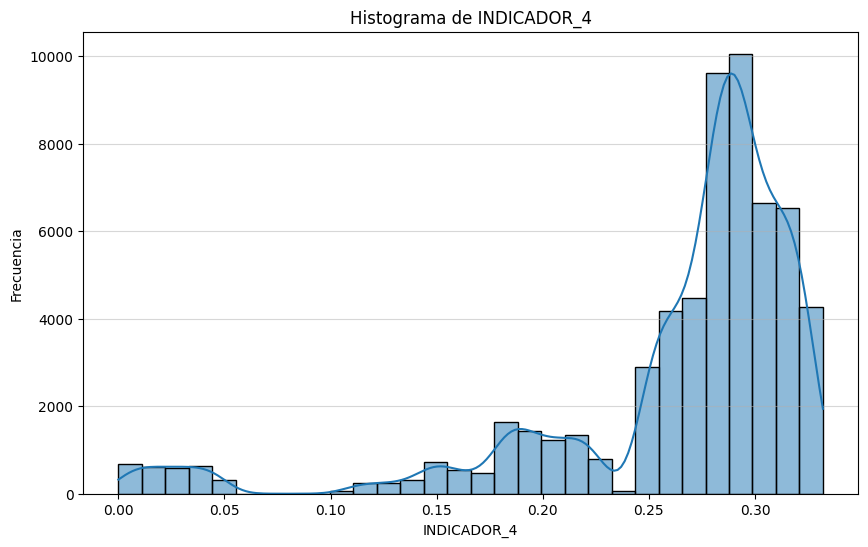

In [ ]:
# ver como se comportan los datos de los indicadores

for col in ['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=d, x=col, kde=True, bins=30)
    title_hist = f'Histograma de {col}'
    plt.title(title_hist)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

Boxplot para odemtofocar valores irregulares

Text(0, 0.5, 'Valores')

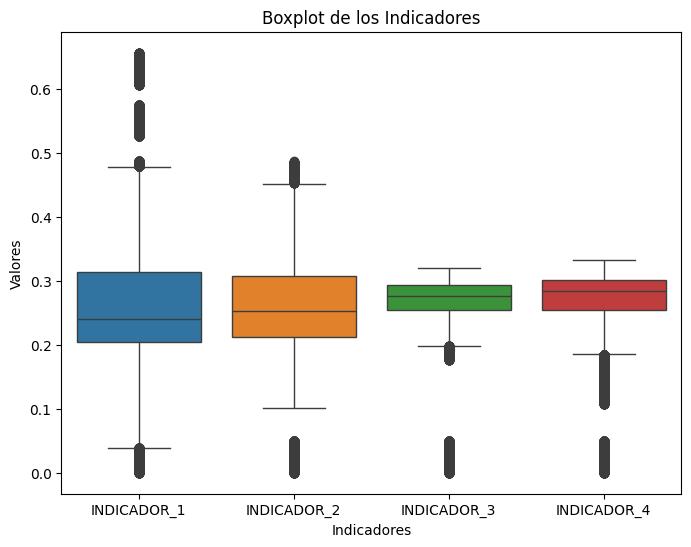

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=d[['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']])
plt.title('Boxplot de los Indicadores')
plt.xlabel('Indicadores')
plt.ylabel('Valores')

Por el lado de las variables numéricas que venían con el dataset original sin transformar, están bien, ya que en sí son proporciones. Hay algunos outliers, pero son moderados y se ve que hay consistencia entre los cuatro indicadores; entonces, en este caso está bien. En este caso, no hay que hacerle ninguna limpieza o transformación.

### EDA

Luego de esto quiero hacer un analisis EDA simple para ver como se comporta un poco la variable objectivo con las demás variables ahora que ya estan transformadas y lista para continuar con el entrenamiento del modelo, iniciando con algo general y finalizando con algo más especifico con el siguiente analisis.


In [ ]:
d.head(2)

,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,E_PRGM_DEPARTAMENTO_NARIÑO,E_PRGM_DEPARTAMENTO_NORTE SANTANDER,E_PRGM_DEPARTAMENTO_PUTUMAYO,E_PRGM_DEPARTAMENTO_QUINDIO,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE,E_PRGM_DEPARTAMENTO_VAUPES
0,20212,6.0,1.0,3,1,5.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20212,4.0,0.0,3,0,6.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


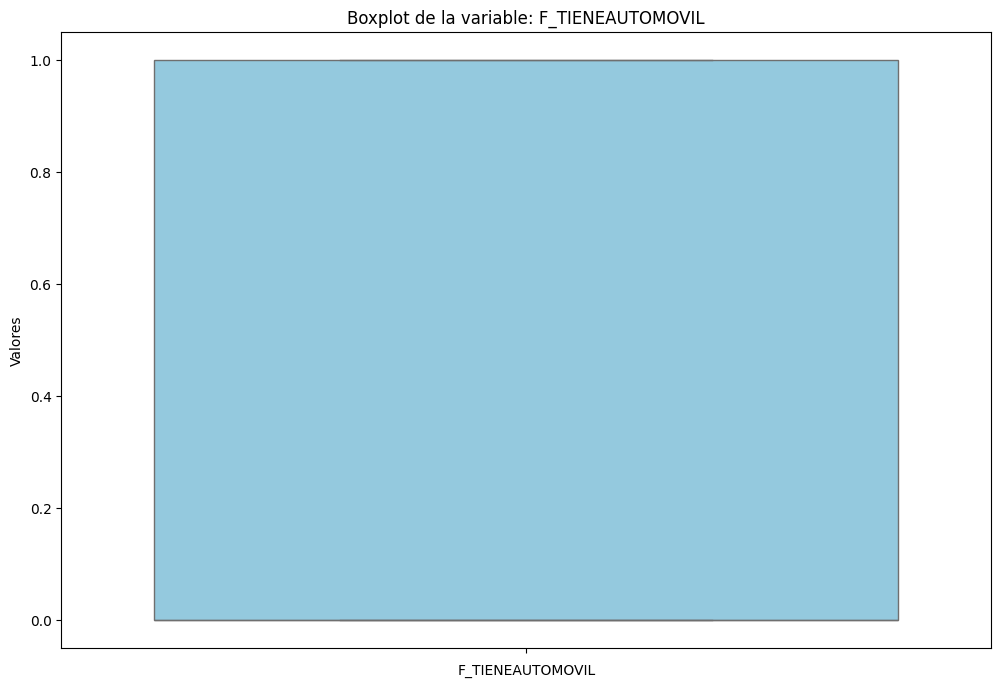

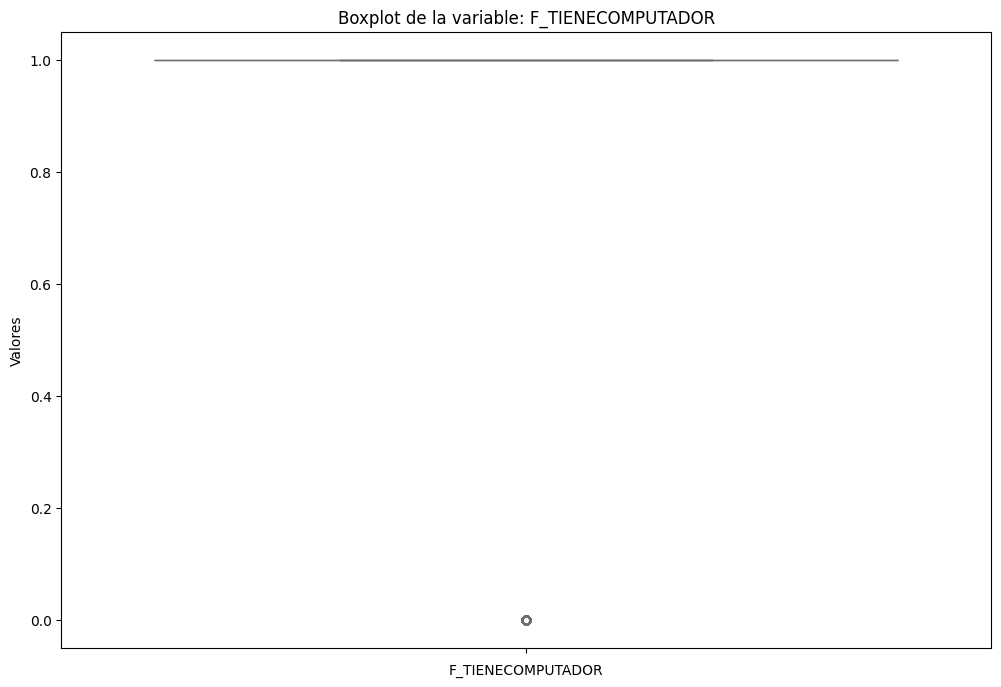

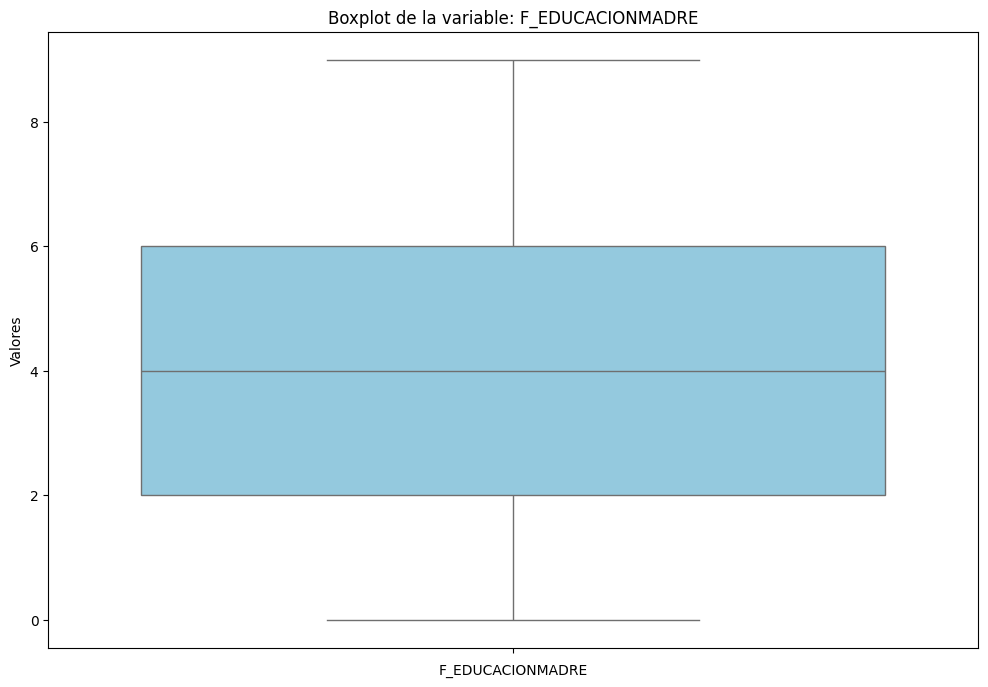

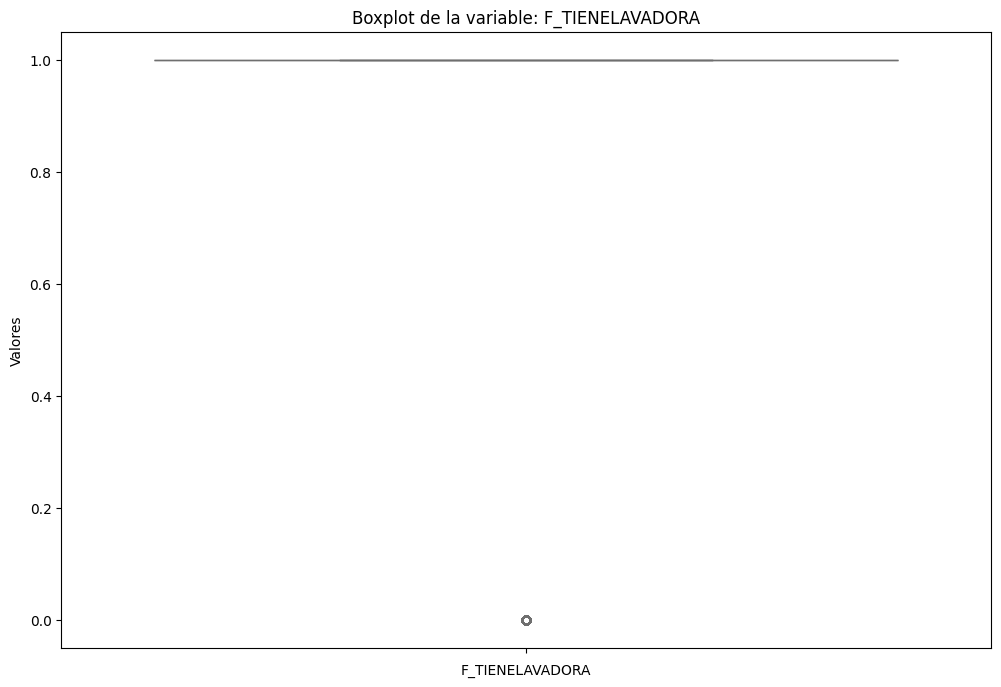

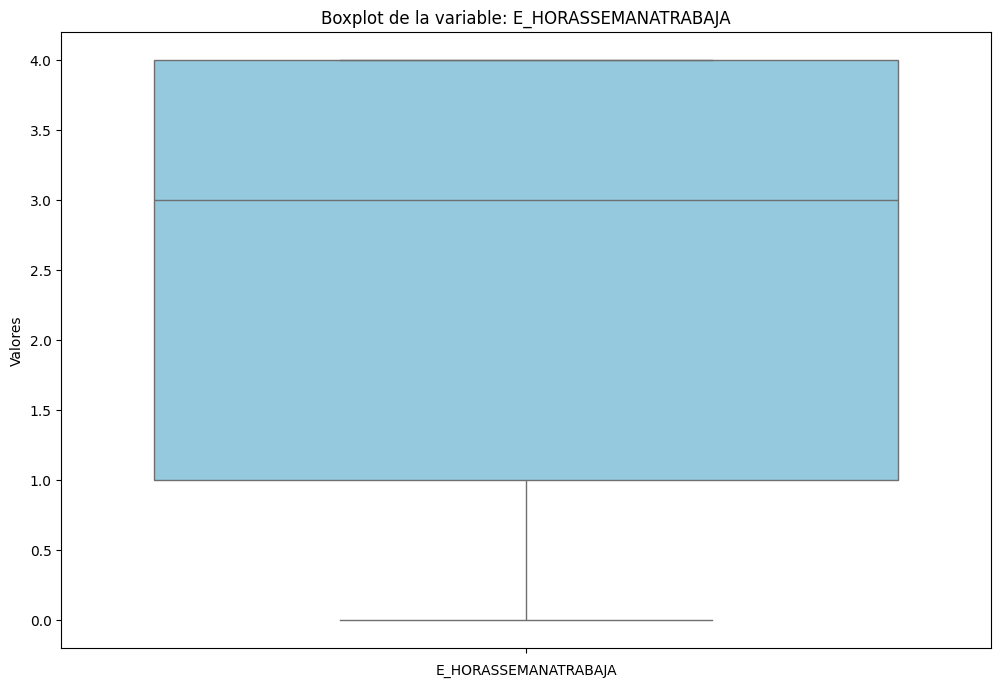

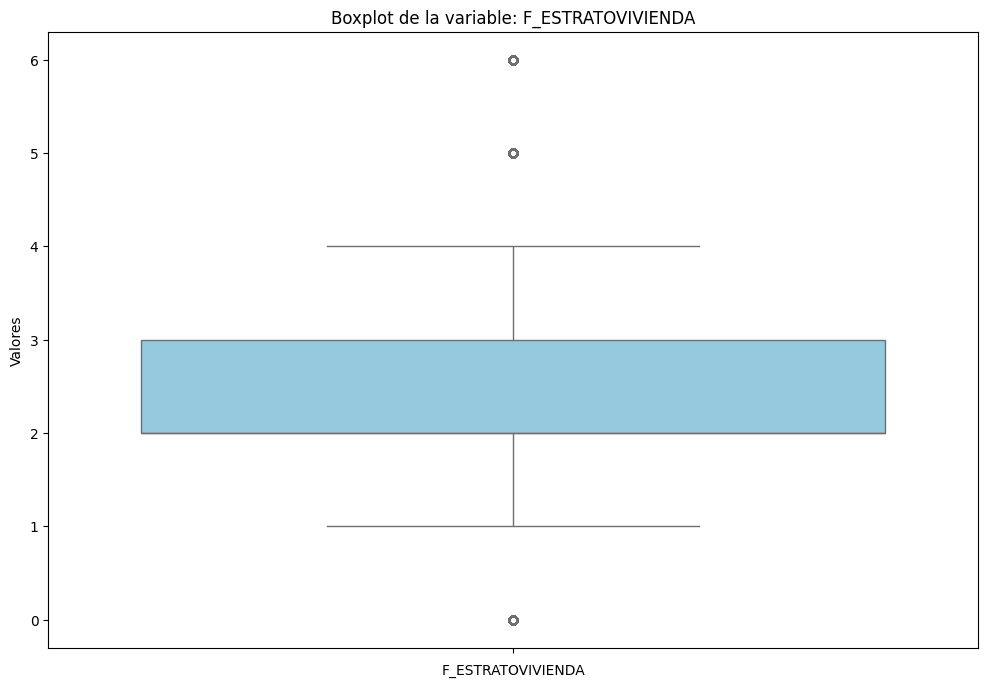

In [ ]:
# Identificar si ahora con la transformación del dataset encontramos algunos outliers
# de alguanas variables que más me llaman la atención por ejemplo las que tenian valores
# nulos y luego fueron rellenadas.

columns = np.array(["F_TIENEAUTOMOVIL", "F_TIENECOMPUTADOR", "F_EDUCACIONMADRE", "F_TIENELAVADORA", "E_HORASSEMANATRABAJA", "F_ESTRATOVIVIENDA"])

for col in columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=d[col], color="skyblue")
    plt.title(f"Boxplot de la variable: {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Valores")
    plt.xticks(rotation=90)
    plt.show()



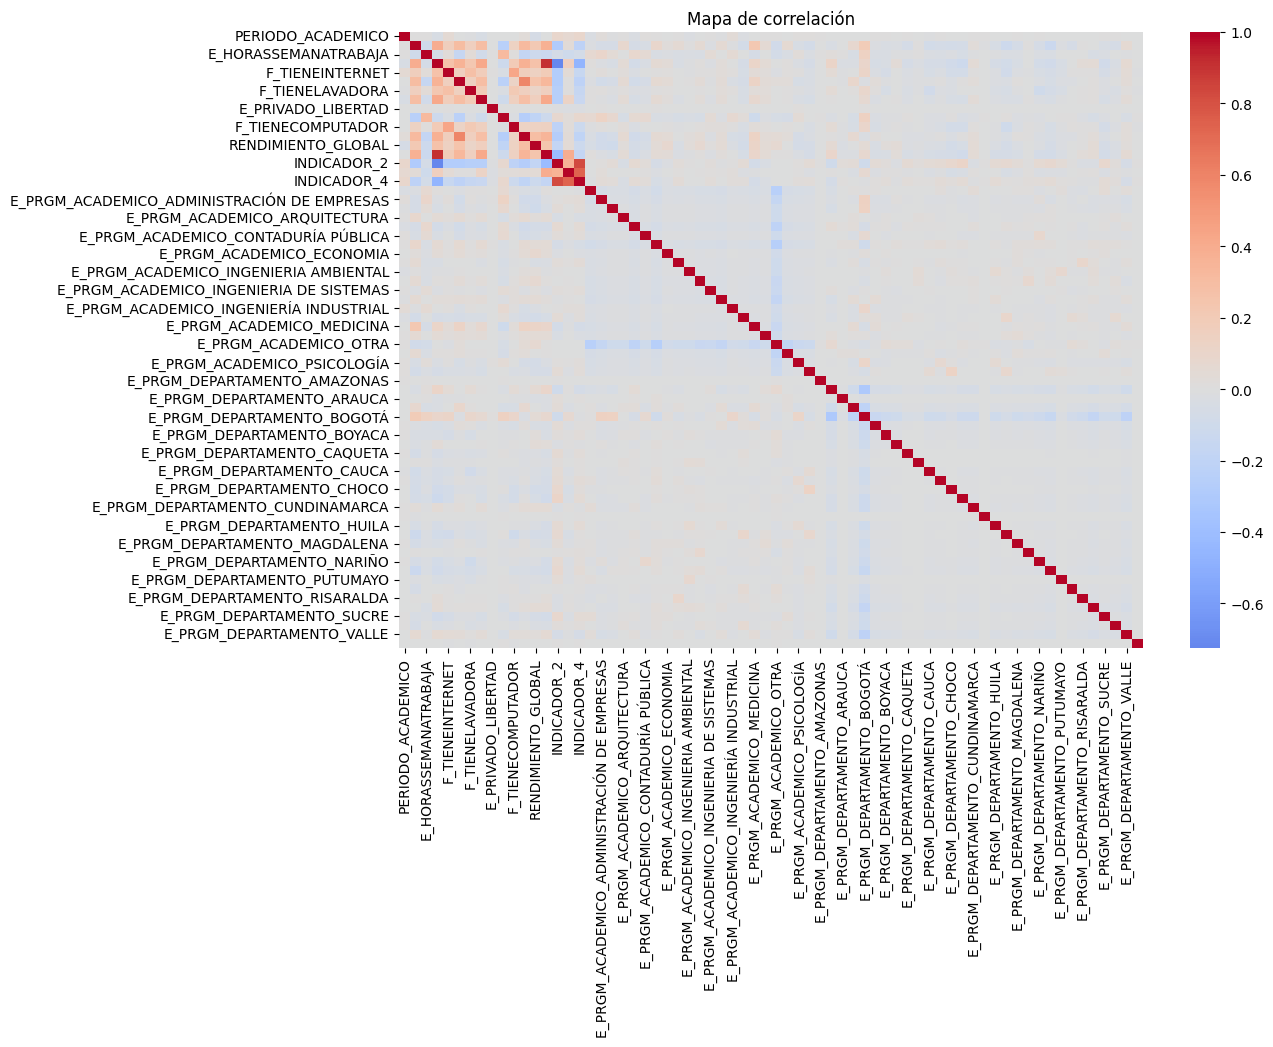

In [ ]:
# Mapa de correlación

plt.figure(figsize=(12, 8))
corr = d.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, center=0)
plt.title("Mapa de correlación")
plt.show()

ahora un analisis de balance de clases

RENDIMIENTO_GLOBAL
1    25.144394
2    25.028879
3    25.020628
0    24.806099
Name: proportion, dtype: float64


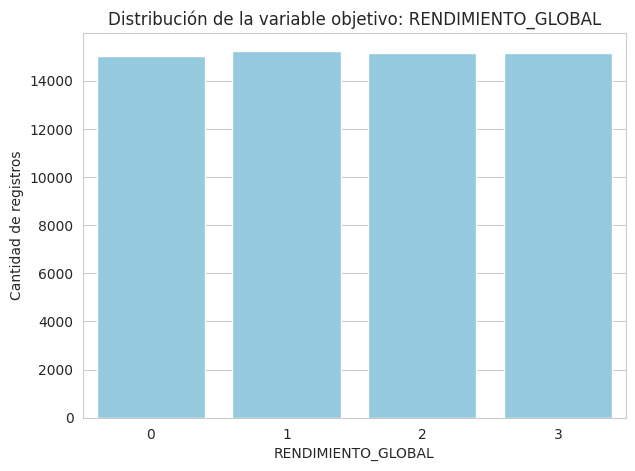

In [ ]:
obj = "RENDIMIENTO_GLOBAL"
print(d[obj].value_counts(normalize=True) * 100)

plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")
sns.countplot(x=obj, data=d, color="skyblue")
plt.title(f"Distribución de la variable objetivo: {obj}")
plt.ylabel("Cantidad de registros")
plt.show()

In [ ]:
corr_obj = corr[obj].sort_values(ascending=False)
print("Correlación de las variables con la variable objectivo")
print(display(corr_obj))

Correlación de las variables con la variable objectivo


,RENDIMIENTO_GLOBAL
RENDIMIENTO_GLOBAL,1.000000
F_EDUCACIONMADRE,0.286631
F_ESTRATOVIVIENDA,0.261121
F_EDUCACIONPADRE,0.252383
INDICADOR_1,0.245193
...,...
E_PRGM_ACADEMICO_ADMINISTRACIÓN EN SALUD OCUPACIONAL,-0.096708
E_HORASSEMANATRABAJA,-0.114583
INDICADOR_4,-0.120172
INDICADOR_2,-0.184850


None
